#### S: susceptible I: infected R: removed  M: Population
#### S(t) + I(t) + R(t) = M

In [37]:
using DifferentialEquations,Plots

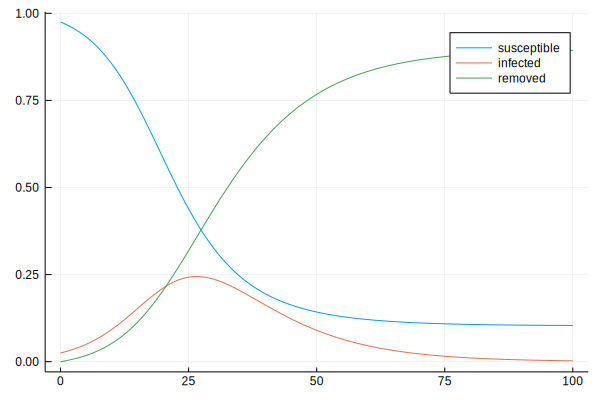

In [59]:
function SIR(X)
    S = X[1]
    I = X[2]
    R = X[3]
    newS = S - beta*S*I*dt
    newI = I + (beta*S*I - gamma*I)*dt
    newR = R + gamma * I * dt
    return [newS newI newR]
end

beta, gamma = 0.25, 0.1
initialInfect = 0.025
tEnd = 100.0
dt = 0.1

nsteps = round(Int64, tEnd/dt)
X = Array{Float64}(undef, nsteps+1, 3)
time = Array{Float64}(undef,nsteps+1)

initX = [1-initialInfect, initialInfect, 0.0]
X[1,:] = initX
time[1] = 0

for step = 1:nsteps
    X[step+1,:] = SIR(X[step, :])
    time[step+1] = time[step] + dt
end

plot(time,X, label = ["susceptible" "infected" "removed"])


R0 = 2.5
Final infected proportion= 0.8928812377994341


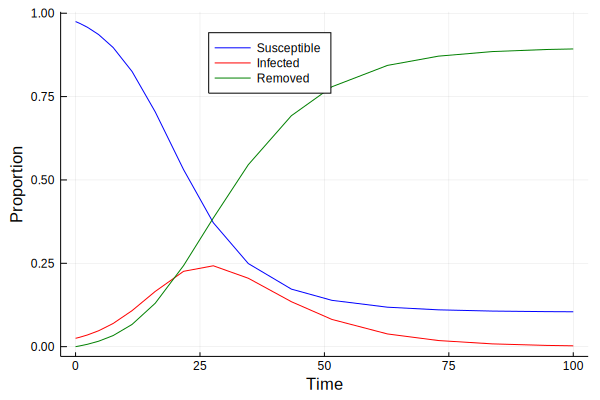

In [60]:
beta, gamma = 0.25, 0.1
initialInfect = 0.025
println("R0 = ", beta/gamma)

initX = [1-initialInfect,initialInfect, 0.0]
tEnd = 100.0

RHS(x,parms,t) = [ -beta*x[1]*x[2],
-gamma*x[2] + beta*x[1]*x[2],
gamma*x[2] ]

prob = ODEProblem(RHS, initX, (0,tEnd), 0)
sol = solve(prob)
println("Final infected proportion= ", sol.u[end][3])
plot(sol.t,((x)->x[1]).(sol.u),label = "Susceptible", c=:blue)
plot!(sol.t,((x)->x[2]).(sol.u),label = "Infected", c=:red)
plot!(sol.t,((x)->x[3]).(sol.u),label = "Removed", c=:green, xlabel = "Time", ylabel = "Proportion",legend = :top)